# LIAR Dataset - Comprehensive Exploratory Data Analysis

---

This notebook performs a detailed analysis of the **LIAR dataset**, which contains political statements labeled for their veracity. The goal is to understand the data structure, clean it, and prepare it for fact-checking models.

**Dataset:** LIAR - A benchmark dataset for fake news detection

---

## 1. Environment Setup & Data Loading

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

print("=" * 80)
print("LIAR DATASET - EXPLORATORY DATA ANALYSIS")
print("=" * 80)

LIAR DATASET - EXPLORATORY DATA ANALYSIS


In [13]:
# Load the dataset
df = pd.read_csv("Liar_Dataset.csv")

print("\n[INFO] Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")


[INFO] Dataset loaded successfully!
Shape: 12787 rows × 14 columns


## 2. Initial Data Exploration

In [14]:
# First 5 rows
df.head()

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [15]:
# Dataset shape
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 12787, Columns: 14


In [16]:
# Data types
df.dtypes

,0
[ID].json,object
label,object
statement,object
subject(s),object
speaker,object
speaker's job title,object
state info,object
party affiliation,object
barely true counts,int64
false counts,int64


In [17]:
# Statistical summary
df.describe(include="all")

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
count,12787,12787,12787,12787,12787,9221,10038,12787,12787.000000,12787.000000,12787.000000,12787.000000,12787.000000,12658
unique,12787,6,12761,4534,3308,1354,84,24,NaN,NaN,NaN,NaN,NaN,5141
top,9117.json,half-true,On a cap-and-trade plan.,health-care,barack-obama,President,Texas,republican,NaN,NaN,NaN,NaN,NaN,a news release
freq,1,2627,3,474,611,615,1259,5663,NaN,NaN,NaN,NaN,NaN,309
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.585673,13.361070,17.188394,16.500430,6.252366,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.979013,24.141438,35.849874,36.167516,16.181854,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,3.000000,3.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,15.000000,13.000000,12.000000,5.000000,NaN


### Conclusion - Initial Exploration:

- The dataset contains political statements with multiple features
- Mix of categorical (speaker, venue) and numerical (count) features
- Contains metadata like speaker's job, party affiliation, and venue
- Historical counts of speaker's truthfulness are included

## 3. Data Quality Assessment

In [18]:
# Check for missing values
print("Missing Values:")
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Missing Values:
speaker's job title    3566
state info             2749
venue                   129
dtype: int64


In [19]:
# Handle missing values
df["speaker's job title"].fillna("Unknown", inplace=True)
df["state info"].fillna("Unknown", inplace=True)
df["venue"].fillna("Unknown", inplace=True)

print("Missing Values After Imputation:")
print(f"{df.isnull().sum().sum()} missing values remaining")

Missing Values After Imputation:
0 missing values remaining


In [20]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate records")

Found 0 duplicate records


In [21]:
# Remove duplicates
df = df.drop_duplicates(keep=False)
print(f"After removal: {df.duplicated().sum()} duplicates")
print(f"Final dataset shape: {df.shape}")

After removal: 0 duplicates
Final dataset shape: (12787, 14)


In [22]:
# Remove unnecessary ID column
if "[ID].json" in df.columns:
    df.drop("[ID].json", axis=1, inplace=True)
    print("[INFO] Removed '[ID].json' column")

[INFO] Removed '[ID].json' column


### Conclusion - Data Quality:

- Missing values were found in speaker's job title, state info, and venue
- Imputed missing values with 'Unknown' to preserve data
- Removed duplicate records to ensure data integrity
- Final clean dataset ready for analysis

## 4. Target Variable Analysis (Label Distribution)

In [23]:
# Label distribution
print("Label Distribution:")
print(df["label"].value_counts())

Label Distribution:
label
half-true      2627
FALSE          2504
mostly-true    2454
barely-true    2102
TRUE           2053
pants-fire     1047
Name: count, dtype: int64


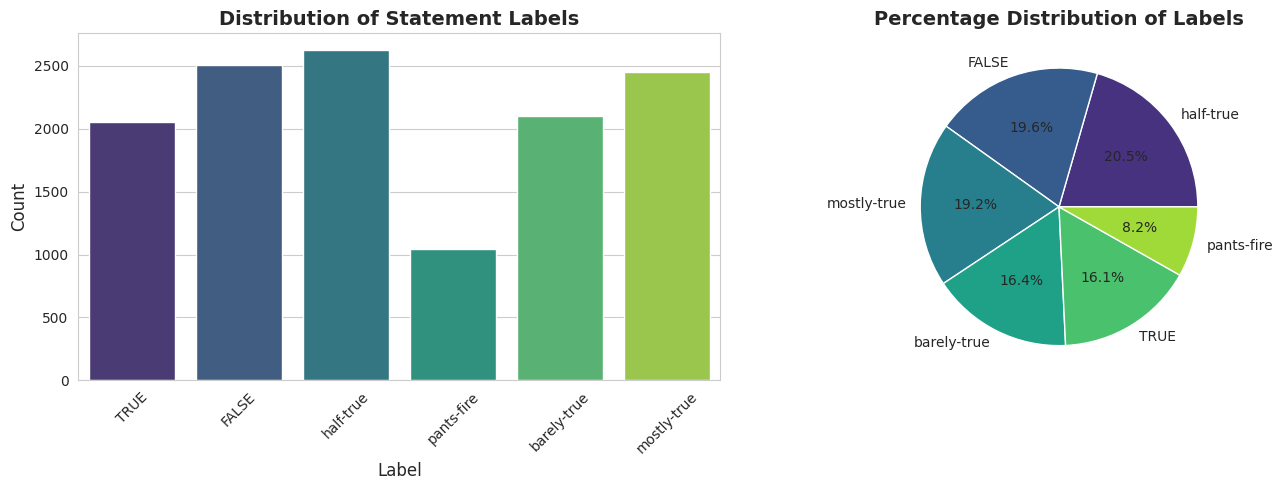

In [24]:
# Visualize label distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(data=df, x="label", ax=axes[0], palette="viridis")
axes[0].set_title('Distribution of Statement Labels', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Label', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

df["label"].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1],
                                colors=sns.color_palette("viridis", len(df["label"].unique())))
axes[1].set_ylabel('')
axes[1].set_title('Percentage Distribution of Labels', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - Target Variable Analysis:

- Dataset is imbalanced with 6 truthfulness categories
- Most common labels: half-true, false, mostly-true
- Least common: pants-fire (most egregious lies)
- Imbalanced distribution may require sampling techniques or weighted models
- Binary classification (true vs false) might be more practical than 6-class

## 5. Word Frequency Analysis by Label

In [25]:
def create_word_frequency_chart(label_name):
    """Create word frequency bubble chart for a specific label"""
    data1 = df[df['label'] == label_name]
    all_words = ' '.join(data1['statement']).lower()
    words = re.findall(r'\b\w+\b', all_words)
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to',
                  'for', 'of', 'is', 'are', 'was', 'were'}
    words = [w for w in words if w not in stop_words and len(w) > 2]

    word_counts = Counter(words).most_common(20)
    words_list, counts = zip(*word_counts)

    x = np.random.rand(len(words_list))
    y = np.random.rand(len(words_list))

    plt.figure(figsize=(8, 8))
    plt.scatter(x, y, s=[c*20 for c in counts], alpha=0.5, c=counts, cmap='viridis')
    for i, word in enumerate(words_list):
        plt.annotate(word, (x[i], y[i]), ha='center', va='center', fontsize=10)
    plt.axis('off')
    plt.title(f'Word Frequency Bubble Chart - "{label_name}" Statements', fontsize=16)
    plt.colorbar(label='Frequency')
    plt.show()

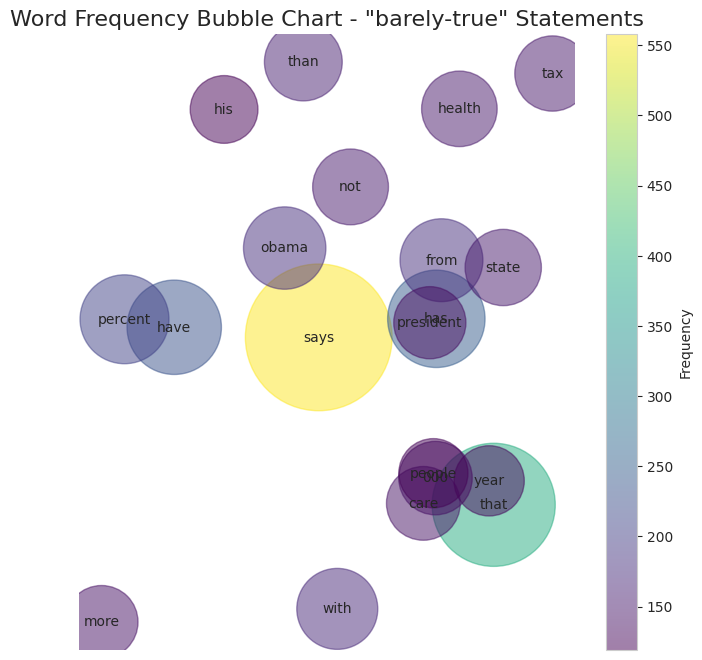

In [26]:
# Generate charts for 'barely-true' statements
create_word_frequency_chart('barely-true')

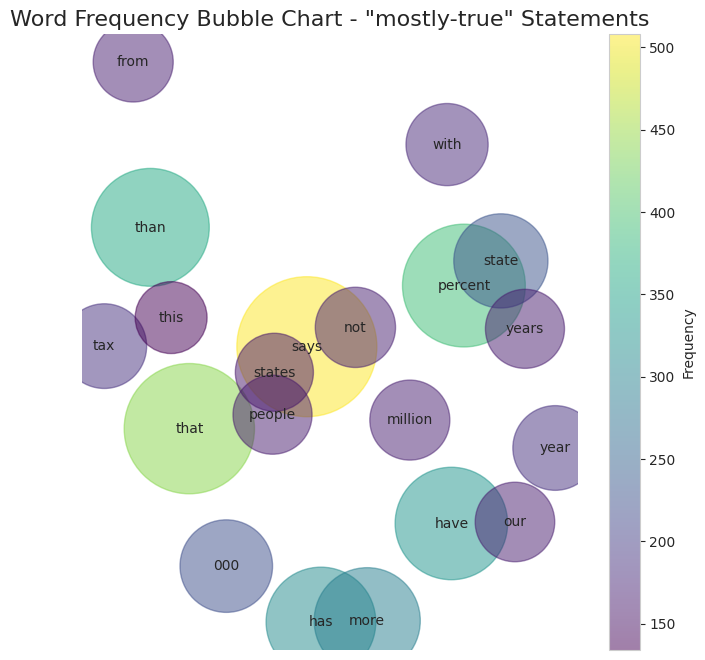

In [27]:
# Generate charts for 'mostly-true' statements
create_word_frequency_chart('mostly-true')

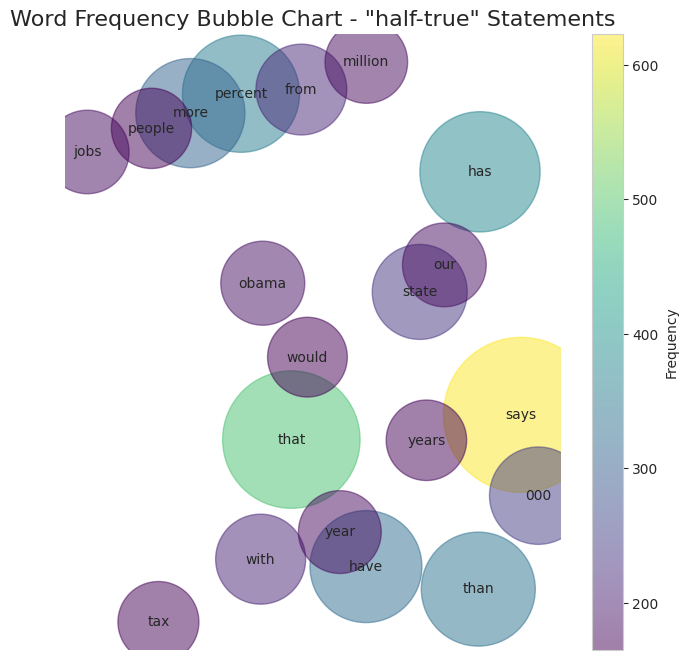

In [28]:
# Generate charts for 'half-true' statements
create_word_frequency_chart('half-true')

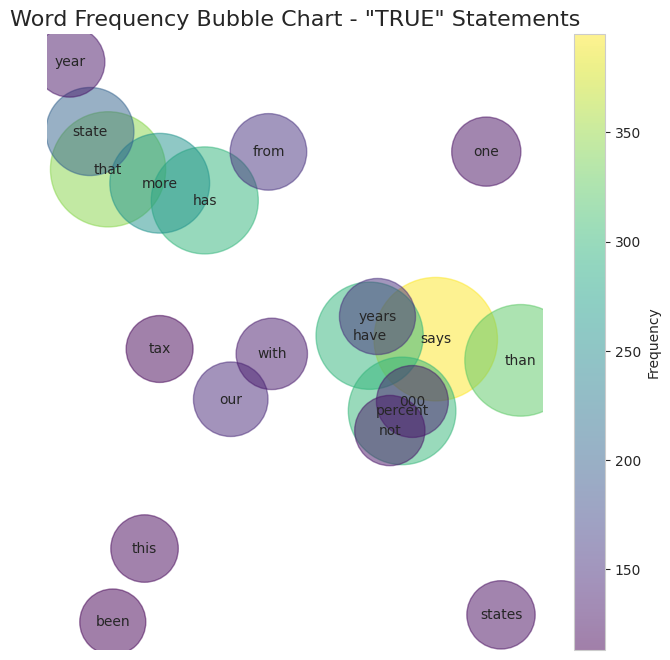

In [29]:
# Generate charts for 'TRUE' statements
create_word_frequency_chart('TRUE')

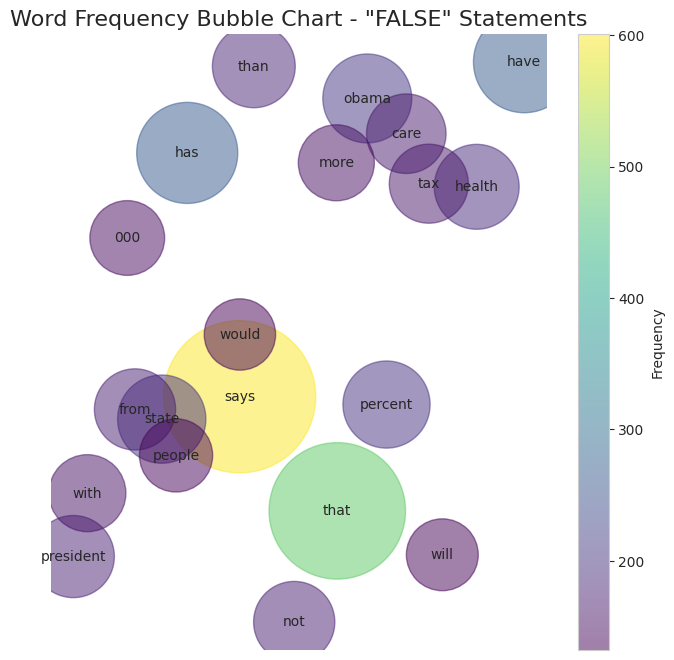

In [30]:
# Generate charts for 'FALSE' statements
create_word_frequency_chart('FALSE')

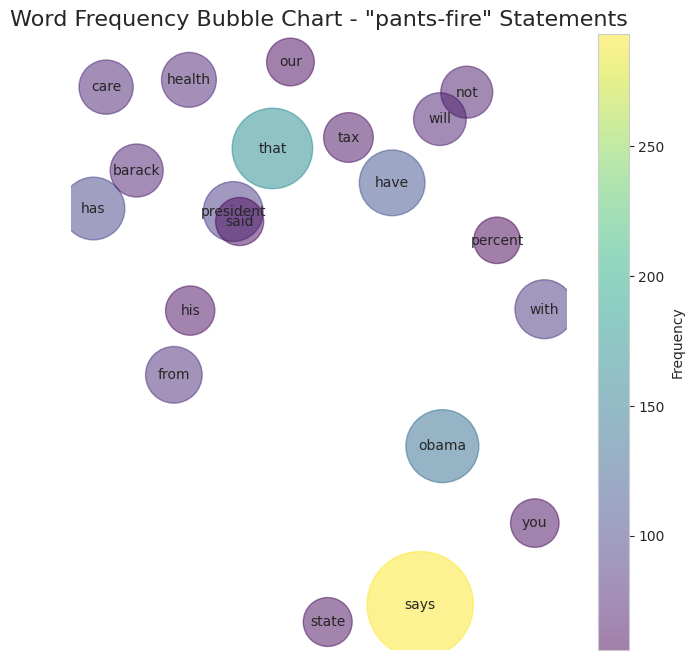

In [31]:
# Generate charts for 'pants-fire' statements
create_word_frequency_chart('pants-fire')

### Conclusion - Word Frequency Analysis:

- Common political terms appear across all categories (says, people, percent)
- TRUE statements show more specific factual terms and data references
- FALSE/pants-fire statements often contain emotional or exaggerated language
- Context words like 'Obama', 'health', 'tax' are frequent across labels
- Word frequency alone may not be sufficient for classification

## 6. Text Preprocessing Pipeline

In [32]:
# 6.1 Lowercase conversion
print("6.1 Converting to lowercase...")
df["statement"] = df["statement"].str.lower()
print("Sample:", df["statement"].tail(2).values)

6.1 Converting to lowercase...
Sample: ["a new poll shows 62 percent support the president's plan to reform health care. that means ... letting you choose between keeping the private insurance you have and a public health insurance plan."
 'no one claims the report vindicating new jersey gov. chris christie in the bridge scandal is conclusive.']


In [33]:
# 6.2 Remove stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)
STOPWORDS = set(stopwords.words('english'))

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

print("6.2 Removing stopwords...")
df["statement"] = df["statement"].apply(lambda text: cleaning_stopwords(text))
print("Sample:", df["statement"].head(2).values)

6.2 Removing stopwords...
Sample: ['building wall u.s.-mexico border take literally years.'
 'wisconsin pace double number layoffs year.']


In [34]:
# 6.3 Remove punctuation
import string

def cleaning_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

print("6.3 Removing punctuation...")
df["statement"] = df["statement"].apply(lambda x: cleaning_punctuations(x))
print("Done!")

6.3 Removing punctuation...
Done!


In [35]:
# 6.4 Remove repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

print("6.4 Removing repeating characters...")
df["statement"] = df["statement"].apply(lambda x: cleaning_repeating_char(x))
print("Done!")

6.4 Removing repeating characters...
Done!


In [36]:
# 6.5 Remove emails
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

print("6.5 Removing email addresses...")
df["statement"] = df["statement"].apply(lambda x: cleaning_email(x))
print("Done!")

6.5 Removing email addresses...
Done!


In [37]:
# 6.6 Remove URLs
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

print("6.6 Removing URLs...")
df["statement"] = df["statement"].apply(lambda x: cleaning_URLs(x))
print("Done!")

6.6 Removing URLs...
Done!


In [38]:
# 6.7 Remove numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

print("6.7 Removing numbers...")
df["statement"] = df["statement"].apply(lambda x: cleaning_numbers(x))
print("Done!")

6.7 Removing numbers...
Done!


In [39]:
# 6.8 Tokenization
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
print("6.8 Tokenizing text...")
df["statement"] = df["statement"].apply(tokenizer.tokenize)
print("Sample:", df["statement"].head(2).values)

6.8 Tokenizing text...
Sample: [list(['building', 'wal', 'usmexico', 'border', 'take', 'literaly', 'years'])
 list(['wisconsin', 'pace', 'double', 'number', 'layofs', 'year'])]


In [40]:
# 6.9 Stemming
st = nltk.PorterStemmer()

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

print("6.9 Applying stemming...")
df["statement"] = df["statement"].apply(lambda x: stemming_on_text(x))
print("Done!")

6.9 Applying stemming...
Done!


In [41]:
# 6.10 Lemmatization
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()

def lemmatizer_on_text(data):
    if isinstance(data, str):
        words = data.split()
        text = [lm.lemmatize(word.lower()) for word in words]
        return ' '.join(text)
    return data

print("6.10 Applying lemmatization...")
df["statement"] = df["statement"].apply(lemmatizer_on_text)
print("Done!")

6.10 Applying lemmatization...
Done!


### Conclusion - Text Preprocessing:

- Applied comprehensive text cleaning pipeline:
  - Lowercasing, stopword removal, punctuation removal
  - Cleaned special characters (emails, URLs, numbers)
  - Tokenization, stemming, and lemmatization
- Text is now standardized and ready for feature extraction
- Preprocessing reduces vocabulary size and noise

## 7. Vocabulary Analysis

In [42]:
words = [word for tokens in df["statement"] for word in tokens]
length_of_each_sentence = [len(tokens) for tokens in df["statement"]]
vocabulary = sorted(list(set(words)))

print(f"Total words: {len(words)}")
print(f"Vocabulary size: {len(vocabulary)}")
print(f"Average statement length: {np.mean(length_of_each_sentence):.2f} words")

Total words: 136780
Vocabulary size: 13710
Average statement length: 10.70 words


In [43]:
counts_of_words = Counter(words)
print("\nTop 25 most common words:")
print(counts_of_words.most_common(25))


Top 25 most common words:
[('says', 2978), ('percent', 1501), ('state', 1014), ('obama', 878), ('tax', 826), ('health', 776), ('years', 765), ('president', 739), ('people', 735), ('year', 709), ('states', 676), ('milion', 674), ('would', 664), ('care', 655), ('us', 636), ('jobs', 612), ('new', 599), ('one', 577), ('bil', 503), ('bilion', 499), ('texas', 484), ('federal', 476), ('every', 464), ('said', 463), ('barack', 453)]


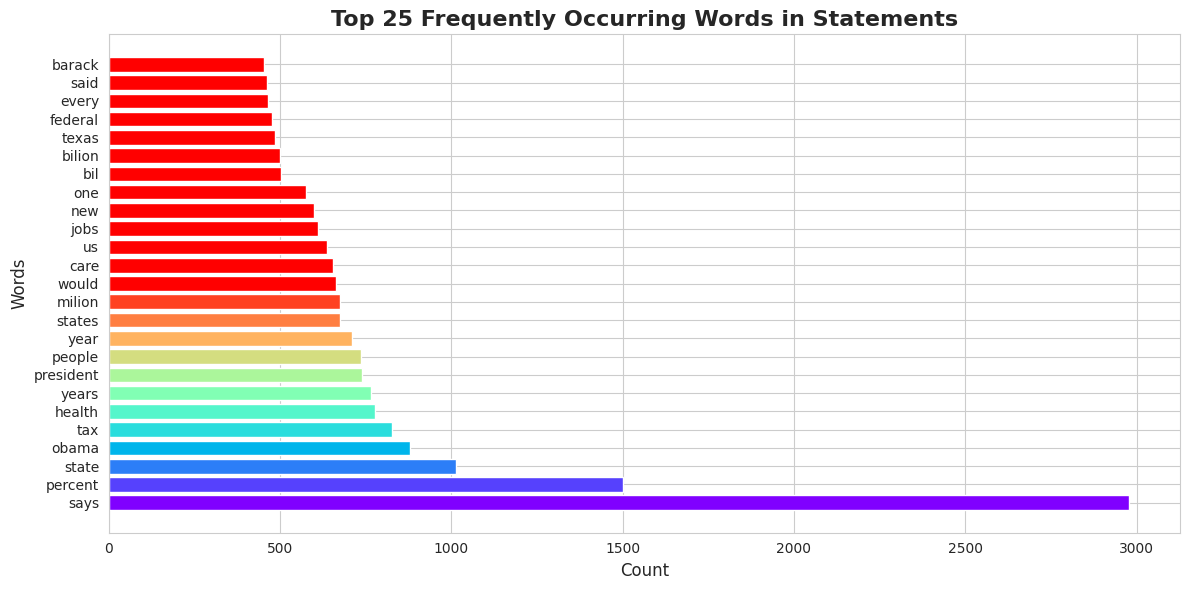

In [44]:
# Visualize top words
from matplotlib import cm
from matplotlib import rcParams

words_list = []
counts = []
for letter, count in counts_of_words.most_common(25):
    words_list.append(letter)
    counts.append(count)

colors = cm.rainbow(np.linspace(0, 2, len(words_list)))
rcParams['figure.figsize'] = 20, 10

plt.figure(figsize=(12, 6))
plt.title('Top 25 Frequently Occurring Words in Statements', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.barh(words_list, counts, color=colors)
plt.tight_layout()
plt.show()

### Conclusion - Vocabulary Analysis:

- Vocabulary size shows unique words after preprocessing
- Political terms dominate: 'said', 'percent', 'tax', 'obama', 'health'
- Average statement length indicates moderate complexity
- Word distribution is long-tailed (few words are very frequent)

## 8. Subject Analysis and Categorization

In [47]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Process subjects
df["subject(s)"] = df["subject(s)"].str.replace(",", " ")
subjectTokenize = []
for sen in df["subject(s)"]:
    subjectTokenize.append(word_tokenize(sen))

filteredsubjects = []
for words in subjectTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredsubjects.append(wordsFiltered)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [48]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
index = 0
for words in filteredsubjects:
    subjects = ""
    for w in words:
        subjects = subjects + ps.stem(w) + " "
    df.at[index, "subject(s)"] = subjects
    index += 1

In [49]:
# Categorize subjects into broader themes
df["dummp"] = df["subject(s)"]
df["dummp"] = df["dummp"].str.strip()

# Apply categorization rules
df.loc[df["dummp"].str.contains('job|worker', na=False), 'dummp'] = 'jobs'
df.loc[df["dummp"].str.contains('hous', na=False), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('county-budget', na=False), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('federal-budget', na=False), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('state-budget|city-budget', na=False), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('state-fin', na=False), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('edu', na=False), 'dummp'] = 'education'
df.loc[df["dummp"].str.contains('economi|incom|tax|debt|market-regul|financial-regul|trade|small-busi', na=False), 'dummp'] = 'economy'
df.loc[df["dummp"].str.contains('militari|veteran', na=False), 'dummp'] = 'military'
df.loc[df["dummp"].str.contains('government-effici|city-govern|county-govern|government-regul|supreme-court|state', na=False), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('health-car|medicar|abort|public-health', na=False), 'dummp'] = 'health-care'
df.loc[df["dummp"].str.contains('crime|gun|public-safeti|legal-issu|terror|homeland-secur', na=False), 'dummp'] = 'crime'
df.loc[df["dummp"].str.contains('climate-chang|environ|anim', na=False), 'dummp'] = 'environment'
df.loc[df["dummp"].str.contains('foreign-polici|voting-record|congress|elect|politics', na=False), 'dummp'] = 'politics'
df.loc[df["dummp"].str.contains('children|immigr|women|popul|poverti|social-secur|religion', na=False), 'dummp'] = 'social'
df.loc[~df["dummp"].str.contains('jobs|budget|education|economy|military|government|health-care|crime|environment|politics|social', na=False), 'dummp'] = 'other'

df["subject(s)"] = df["dummp"]
df = df.drop(columns=['dummp'])

In [50]:
print("Subject Distribution:")
print(df["subject(s)"].value_counts())

Subject Distribution:
subject(s)
budget         1910
other          1835
economy        1689
jobs           1419
health-care    1333
crime          1188
politics        971
social          654
education       629
government      473
military        350
environment     336
Name: count, dtype: int64


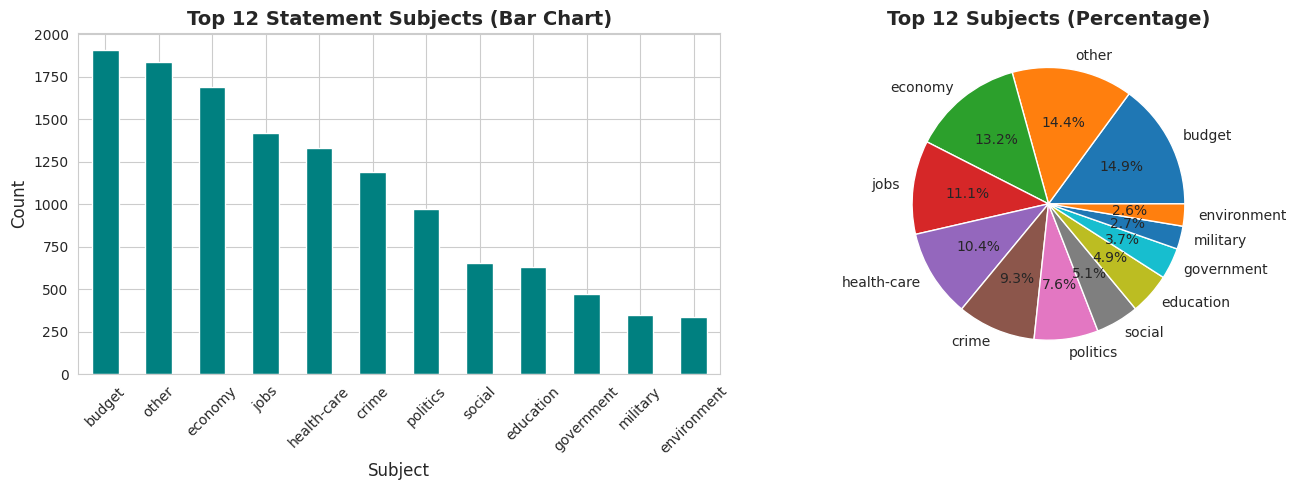

In [51]:
# Visualize subjects
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df["subject(s)"].value_counts().head(12).plot(kind='bar', ax=axes[0], color='teal')
axes[0].set_title('Top 12 Statement Subjects (Bar Chart)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Subject', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

df["subject(s)"].value_counts().head(12).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Top 12 Subjects (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


### Conclusion - Subject Analysis:

- Statements cover 12 main political topics
- Most discussed: economy, health-care, politics, jobs
- Economy-related statements dominate political discourse
- Subject categorization helps identify topic-specific patterns
- Subject can be a useful feature for fact-checking models

## 9. Speaker Analysis

In [52]:
print("Top 10 Most Frequent Speakers:")
print(df["speaker"].value_counts().head(10))

Top 10 Most Frequent Speakers:
speaker
barack-obama       611
donald-trump       343
hillary-clinton    297
mitt-romney        212
john-mccain        189
scott-walker       183
chain-email        178
rick-perry         173
marco-rubio        153
rick-scott         150
Name: count, dtype: int64


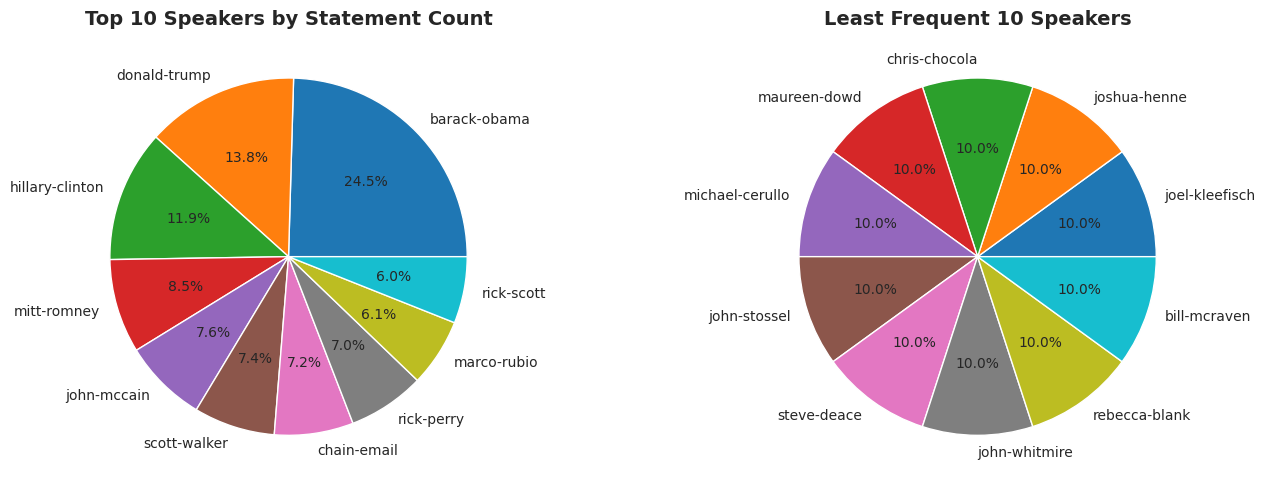

In [53]:
# Visualize speakers
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df["speaker"].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Top 10 Speakers by Statement Count', fontsize=14, fontweight='bold')

df["speaker"].value_counts().tail(10).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Least Frequent 10 Speakers', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - Speaker Analysis:

- High concentration of statements from top political figures
- Speaker identity is highly informative (historical truthfulness)
- Some speakers are checked more frequently than others
- Long tail of infrequent speakers may need special handling

## 10. Speaker's Job Title Analysis

In [54]:
# Process job titles
df["speaker's job title"] = df["speaker's job title"].apply(str)
jobTokenize = []
for sen in df["speaker's job title"]:
    jobTokenize.append(word_tokenize(sen))

filteredjobs = []
for words in jobTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredjobs.append(wordsFiltered)

In [55]:
ps = PorterStemmer()
index = 0
for words in filteredjobs:
    job = ""
    for w in words:
        job = job + ps.stem(w) + " "
    df.at[index, "speaker's job title"] = job
    index += 1

In [56]:
# Categorize job titles
df["dummp"] = df["speaker's job title"]
df["dummp"] = df["dummp"].str.strip()
df.loc[df["dummp"].str.contains('repres', na=False), 'dummp'] = 'U.S. representative'
df.loc[df["dummp"].str.contains('governor', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('state', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('congressman', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('senat', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('congresswoman', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('deleg', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('mayor', na=False), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('presid', na=False), 'dummp'] = 'president'
df.loc[df["dummp"].str.contains('director', na=False), 'dummp'] = 'office director'
df.loc[df["dummp"].str.contains('group', na=False), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('chairman', na=False), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('program', na=False), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('counti', na=False), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('attorney', na=False), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('govern', na=False), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('media', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('blog', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('show', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('host', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('radio', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('tv', na=False), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('unknown', na=False), 'dummp'] = 'unknown'
df.loc[~df["dummp"].str.contains('state representative|president|office director|company|U.S. representative|government|media|unknown', na=False), 'dummp'] = 'other'

df["speaker's job title"] = df["dummp"]
df = df.drop(columns=['dummp'])

In [57]:
print("Job Title Distribution:")
print(df["speaker's job title"].value_counts())

Job Title Distribution:
speaker's job title
state representative    3596
unknown                 3567
other                   1753
president               1500
U.S. representative     1078
media                    485
government               485
company                  207
office director          116
Name: count, dtype: int64


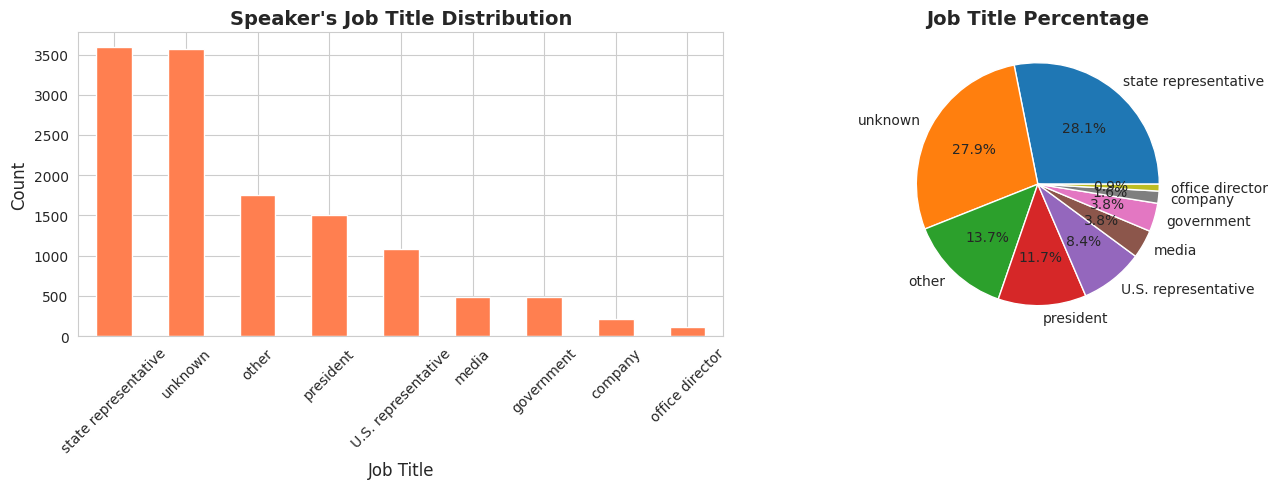

In [58]:
# Visualize job titles
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df["speaker's job title"].value_counts().head(12).plot(kind='bar', ax=axes[0], color='coral')
axes[0].set_title("Speaker's Job Title Distribution", fontsize=14, fontweight='bold')
axes[0].set_xlabel('Job Title', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

df["speaker's job title"].value_counts().head(12).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Job Title Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - Job Title Analysis:

- Majority of statements from state/U.S. representatives
- Government officials and politicians dominate the dataset
- Media personalities also contribute significant statements
- Job title indicates authority level and expertise

## 11. State Information Analysis

In [59]:
print("Top 10 States:")
print(df["state info"].value_counts().head(10))

Top 10 States:
state info
Unknown         2752
Texas           1259
Florida         1231
Wisconsin        900
New York         829
Illinois         692
Ohio             586
Georgia          545
Virginia         512
Rhode Island     452
Name: count, dtype: int64


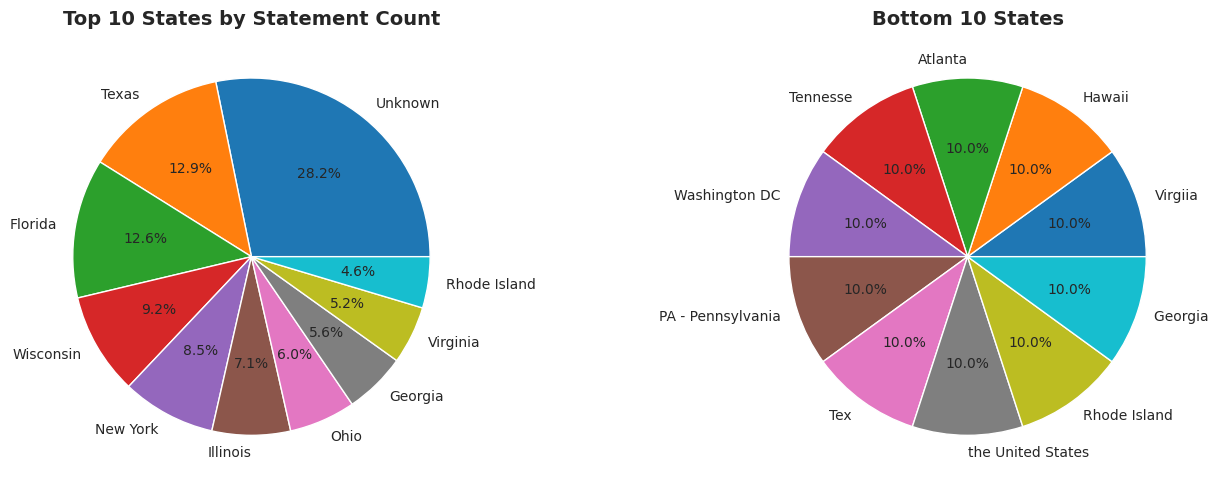

In [60]:
# Visualize states
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df["state info"].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_ylabel('')
axes[0].set_title('Top 10 States by Statement Count', fontsize=14, fontweight='bold')

df["state info"].value_counts().tail(10).plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Bottom 10 States', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - State Analysis:

- Geographic distribution shows concentration in key political states
- Swing states and populous states are more represented
- State information may capture regional political patterns

## 12. Party Affiliation Analysis

In [61]:
print("Original Party Affiliations:")
print(df['party affiliation'].unique())

Original Party Affiliations:
['republican' 'democrat' 'none' 'activist' 'organization' 'libertarian'
 'journalist' 'independent' 'columnist' 'state-official' 'business-leader'
 'talk-show-host' 'government-body' 'newsmaker' 'county-commissioner'
 'constitution-party' 'labor-leader' 'education-official'
 'tea-party-member' 'green' 'liberal-party-canada' 'Moderate'
 'democratic-farmer-labor' 'ocean-state-tea-party-action']


In [62]:
# Consolidate party affiliations
party_replacements = {
    'none': 'Unknown',
    'activist': 'Other',
    'organization': 'Other',
    'libertarian': 'Other',
    'journalist': 'Other',
    'columnist': 'Other',
    'state-official': 'Other',
    'business-leader': 'Other',
    'talk-show-host': 'Other',
    'government-body': 'Other',
    'newsmaker': 'Other',
    'county-commissioner': 'Other',
    'constitution-party': 'Other',
    'labor-leader': 'Other',
    'education-official': 'Other',
    'tea-party-member': 'Other',
    'green': 'Other',
    'liberal-party-canada': 'Other',
    'Moderate': 'Other',
    'democratic-farmer-labor': 'Other',
    'ocean-state-tea-party-action': 'Other',
    'independent': 'Other'
}

df["party affiliation"] = df["party affiliation"].replace(party_replacements)

print("\nConsolidated Party Affiliations:")
print(df['party affiliation'].unique())


Consolidated Party Affiliations:
['republican' 'democrat' 'Unknown' 'Other']


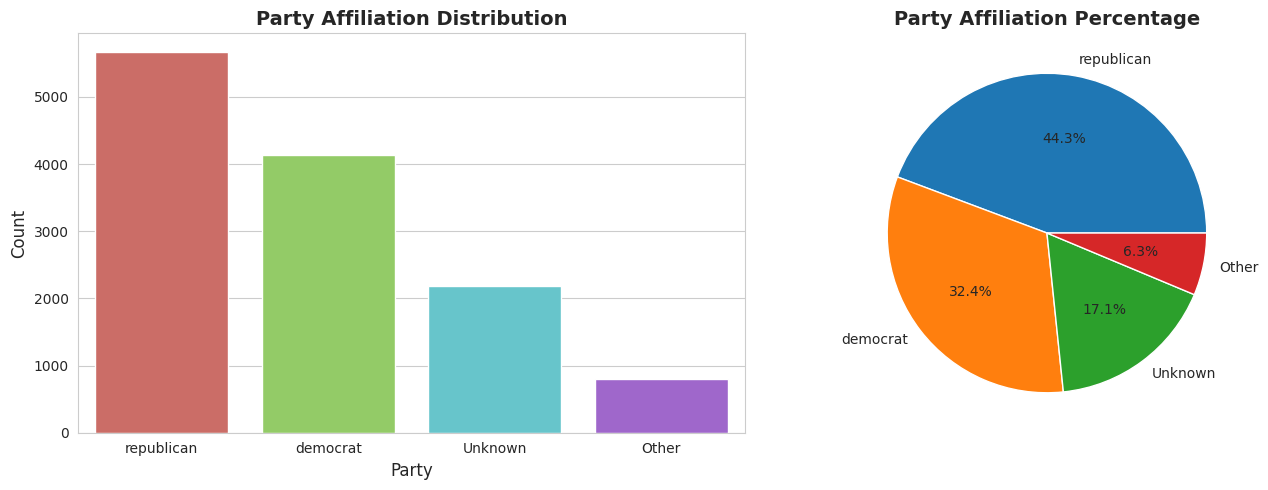

In [63]:
# Visualize party distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='party affiliation', data=df, palette='hls', ax=axes[0])
axes[0].set_title('Party Affiliation Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Party', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)

df["party affiliation"].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Party Affiliation Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - Party Affiliation:

- Majority statements from Republican and Democrat speakers
- Relatively balanced between two major parties
- Party affiliation is a strong predictor of subject matter
- Potential for bias analysis across party lines

## 13. Venue Analysis

In [64]:
# Process venues
df["venue"] = df["venue"].apply(str)

venueTokenize = []
for sen_tex in df['venue']:
    venueTokenize.append(word_tokenize(sen_tex))

filteredVenues = []
for words in venueTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredVenues.append(wordsFiltered)

In [65]:
ps = PorterStemmer()
index = 0
for words in filteredVenues:
    vn = ""
    for w in words:
        vn = vn + ps.stem(w) + " "
    df.at[index, 'venue'] = vn
    index += 1

In [66]:
# Categorize venues
df["dummp"] = df["venue"]
df["dummp"] = df["dummp"].str.strip()
df.loc[df["dummp"].str.contains('confer|press|speech|interview|debate|broadcast|meet|opinion|statement|letter|ralli', na=False), 'dummp'] = 'interview'
df.loc[df["dummp"].str.contains('campaign|ad|flier|commerci|mailer|panel|billboard', na=False), 'dummp'] = 'ad'
df.loc[df["dummp"].str.contains('facebook|imag|media|meme|tweet|email|e-email|forum|blog|twitter', na=False), 'dummp'] = 'social media'
df.loc[df["dummp"].str.contains('abc|articl|news|cnn|msnbc|book|journal|hbo|fox|column|newslett', na=False), 'dummp'] = 'news'
df.loc[df["dummp"].str.contains('websit|web', na=False), 'dummp'] = 'website'
df.loc[df["dummp"].str.contains('show', na=False), 'dummp'] = 'show'
df.loc[df["dummp"].str.contains('unknown', na=False), 'dummp'] = 'unknown'
df.loc[~df["dummp"].str.contains('interview|ad|social media|news|website|show|unknown', na=False), 'dummp'] = 'other'

df["venue"] = df["dummp"]
df = df.drop(columns=['dummp'])

In [67]:
print("Venue Distribution:")
print(df["venue"].value_counts())

Venue Distribution:
venue
interview       5321
other           2424
ad              2238
news            1388
social media     998
website          227
unknown          129
show              62
Name: count, dtype: int64


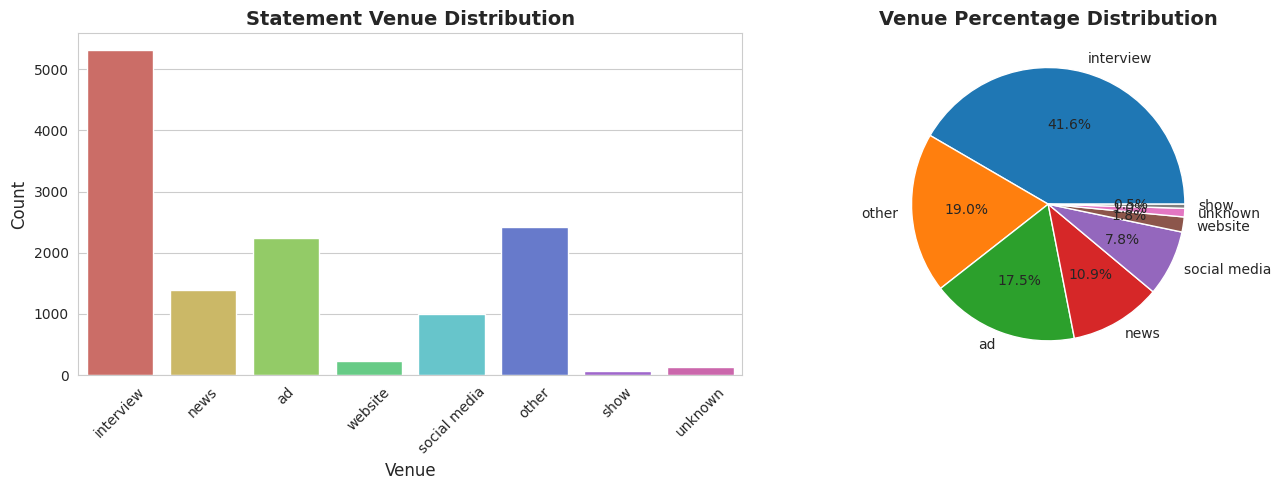

In [68]:
# Visualize venues
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='venue', data=df, palette='hls', ax=axes[0])
axes[0].set_title('Statement Venue Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Venue', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

df["venue"].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Venue Percentage Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Conclusion - Venue Analysis:

- Most statements from interviews, news, and social media
- Digital platforms (social media, websites) increasingly important
- Venue indicates statement formality and preparation level
- Different venues may have different truthfulness patterns

## 14. Historical Truthfulness Counts Analysis

In [69]:
num = df[['barely true counts', 'false counts',
          'half true counts', 'mostly true counts', 'pants on fire counts']]
num = num.fillna(0)

print("Historical Count Statistics:")
print(num.describe())

Historical Count Statistics:
       barely true counts  false counts  half true counts  mostly true counts  \
count        12787.000000  12787.000000      12787.000000        12787.000000   
mean            11.585673     13.361070         17.188394           16.500430   
std             18.979013     24.141438         35.849874           36.167516   
min              0.000000      0.000000          0.000000            0.000000   
25%              0.000000      0.000000          0.000000            0.000000   
50%              2.000000      2.000000          3.000000            3.000000   
75%             12.000000     15.000000         13.000000           12.000000   
max             70.000000    114.000000        160.000000          163.000000   

       pants on fire counts  
count          12787.000000  
mean               6.252366  
std               16.181854  
min                0.000000  
25%                0.000000  
50%                1.000000  
75%                5.000000  
m

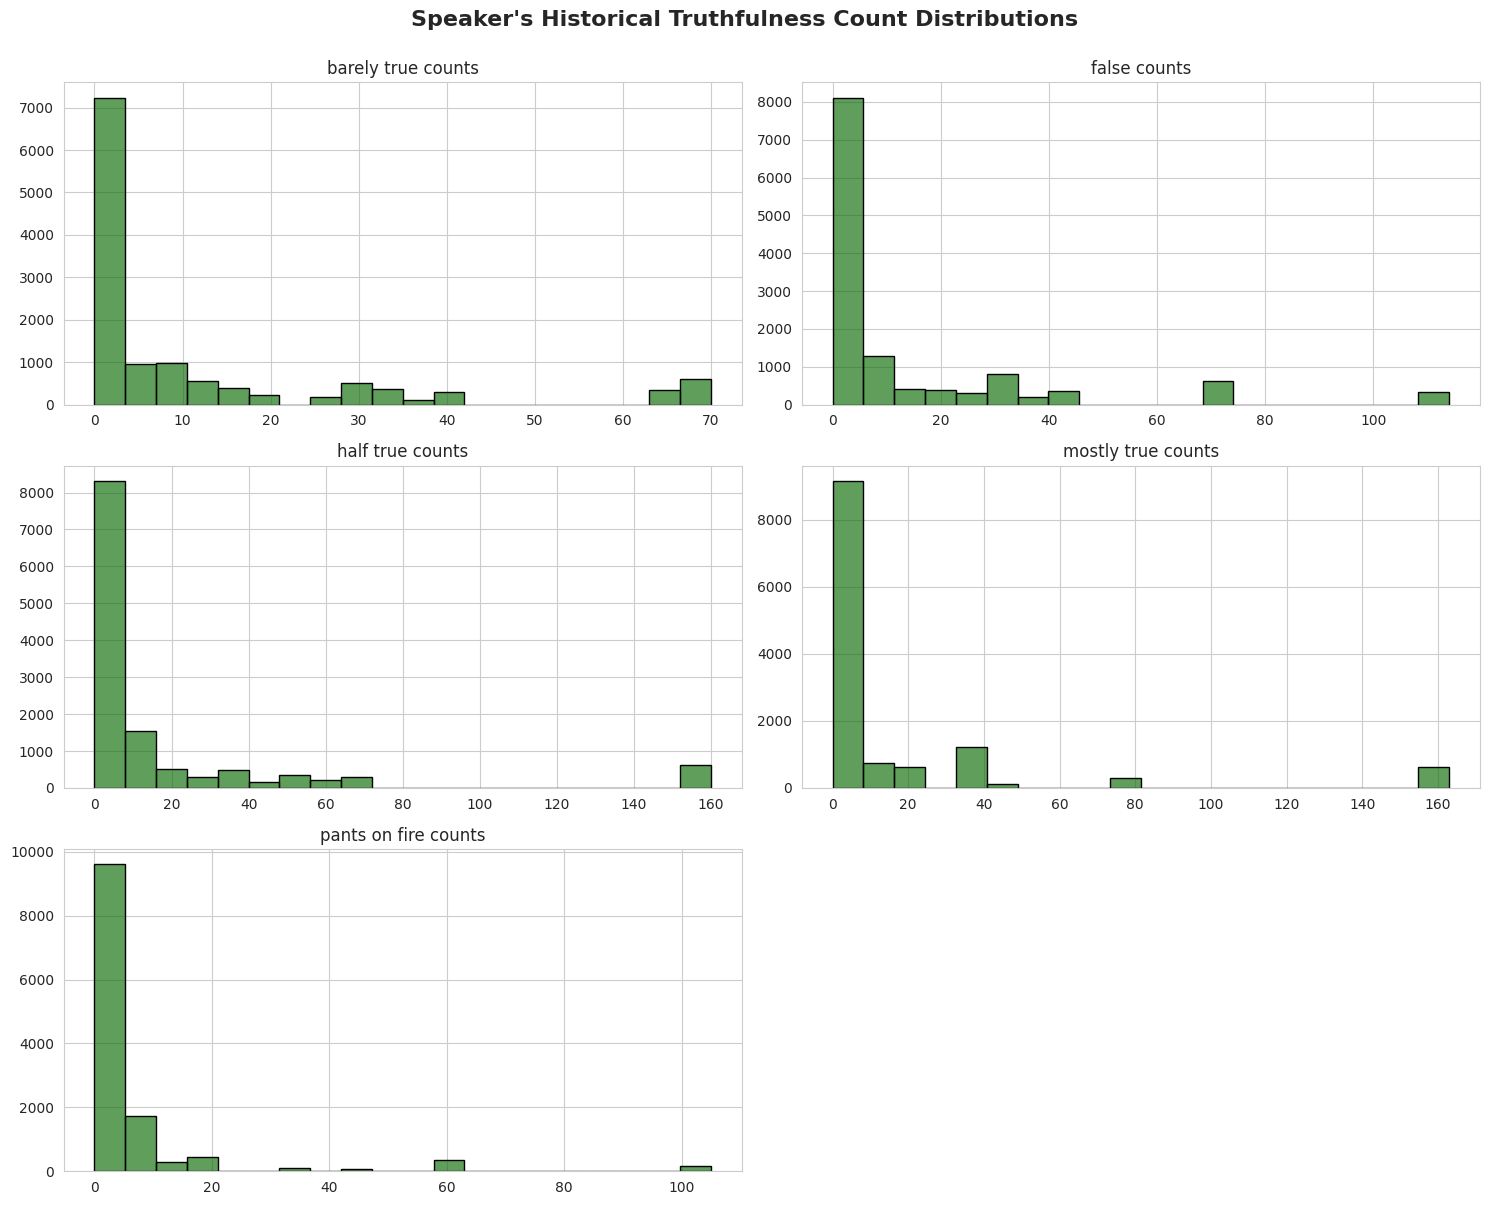

In [70]:
# Visualize distributions
num.hist(figsize=(15, 12), bins=20, color="#107009AA", edgecolor='black')
plt.suptitle("Speaker's Historical Truthfulness Count Distributions",
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Conclusion - Historical Truthfulness Counts:

- Historical counts show speaker's track record
- Most speakers have been fact-checked multiple times
- Strong right-skewed distributions (few speakers checked often)
- These features are highly predictive of future truthfulness
- Could enable speaker-based credibility scoring

## 15. Feature Engineering - TF-IDF Vectorization

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert statement lists back to strings for TF-IDF
df['statement'] = df['statement'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(3, 3),
    max_features=5000)

print("[INFO] Applying TF-IDF vectorization with trigrams...")
Get_Vec = word_vectorizer.fit_transform(df['statement'].astype('str'))
Get_Vec = Get_Vec.toarray()

vocab1 = word_vectorizer.get_feature_names_out()
Features_vect = pd.DataFrame(np.round(Get_Vec, 1), columns=vocab1)

print(f"TF-IDF Features Shape: {Features_vect.shape}")
print("\nSample TF-IDF Features:")
print(Features_vect.head())

[INFO] Applying TF-IDF vectorization with trigrams...
TF-IDF Features Shape: (12787, 5000)

Sample TF-IDF Features:
   3 votes arent  a a bond  a bil florida  a bil that  a bilingual newspaper  \
0            0.0       0.0            0.0         0.0                    0.0   
1            0.0       0.0            0.0         0.0                    0.0   
2            0.0       0.0            0.0         0.0                    0.0   
3            0.0       0.0            0.0         0.0                    0.0   
4            0.0       0.0            0.0         0.0                    0.0   

   a blank check  a bond rating  a bridge nowhere  a budget past  a clarke jr  \
0            0.0            0.0               0.0            0.0          0.0   
1            0.0            0.0               0.0            0.0          0.0   
2            0.0            0.0               0.0            0.0          0.0   
3            0.0            0.0               0.0            0.0          0.0  

In [72]:
# Remove original statement column
df = df.drop(columns=['statement'])

### Conclusion - TF-IDF Vectorization:

- Created TF-IDF features from statements
- Using trigrams (3-word sequences) captures context better
- TF-IDF weights important phrases over common words
- These features capture linguistic patterns of truthfulness

## 16. Categorical Feature Encoding

In [73]:
# Define encoding mappings
cleanup_nums = {
    "venue": {
        'interview': 0, 'ad': 1, 'social media': 2, 'news': 3,
        'website': 4, 'show': 5, 'unknown': -1, 'other': 6
    },
    "speaker's job title": {
        'state representative': 0, 'president': 1, 'office director': 2,
        'company': 3, 'U.S. representative': 4, 'government': 5,
        'media': 6, 'unknown': -1, 'other': 7
    },
    "party affiliation": {
        'republican': 0, 'democrat': 1, 'Unknown': -1, 'Other': 2
    },
    "subject(s)": {
        'jobs': 0, 'military': 1, 'education': 2, 'economy': 3,
        'government': 4, 'health-care': 5, 'crime': 6, 'environment': 7,
        'budget': 8, 'politics': 9, 'social': 10, 'other': 11
    }
}

print("[INFO] Encoding categorical features...")
df.replace(cleanup_nums, inplace=True)

[INFO] Encoding categorical features...


In [74]:
# Concatenate TF-IDF features
df = pd.concat([df, Features_vect], axis=1)

In [75]:
# Encode remaining categorical features
x = pd.Categorical(df['speaker'])
df['speaker'] = x.codes

x = pd.Categorical(df['label'])
df['label'] = x.codes

x = pd.Categorical(df['state info'])
df['state info'] = x.codes

print("Encoded Dataset Shape:", df.shape)
print("\nSample of encoded features:")
print(df.head())

Encoded Dataset Shape: (12787, 5012)

Sample of encoded features:
   label  subject(s)  speaker  speaker's job title  state info  \
0      1          10     2645                    0          62   
1      0           0     1755                    4          79   
2      0           1      871                    1          42   
3      3           5     2657                    7          48   
4      5           6     2901                   -1          79   

   party affiliation  barely true counts  false counts  half true counts  \
0                  0                  30            30                42   
1                  1                   2             1                 0   
2                  0                  63           114                51   
3                  0                   1             1                 3   
4                  1                   5             7                 2   

   mostly true counts  ...  zo own without  zombie apocalypse plan  \
0         

### Conclusion - Categorical Encoding:

- All categorical features converted to numerical format
- Ordinal encoding used for categorical variables
- Speaker, state, and label encoded using categorical codes
- Final feature space ready for ML models
- Dataset is now ready for machine learning models